In [64]:
import requests
from PIL import Image
from io import BytesIO

In [65]:
def download_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [66]:
im1 = download_img('https://www.sanjayjangam.com/wp-content/uploads/2021/10/good-morning-images.jpg')
im1.save('image2.png')

In [67]:
im2 = Image.open(r"C:\Users\ZAID\Pictures\product-1.jpg") # r is for raw string
im2.size

(1000, 800)

In [68]:
im1.show()

In [69]:
im1.info

{'exif': b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'dpi': (72, 72),
 'adobe': 100,
 'adobe_transform': 1}

In [70]:
im2.info

{'exif': b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'dpi': (72, 72),
 'adobe': 100,
 'adobe_transform': 1}

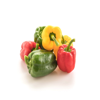

In [71]:
# resize image
im2.resize((100,100))

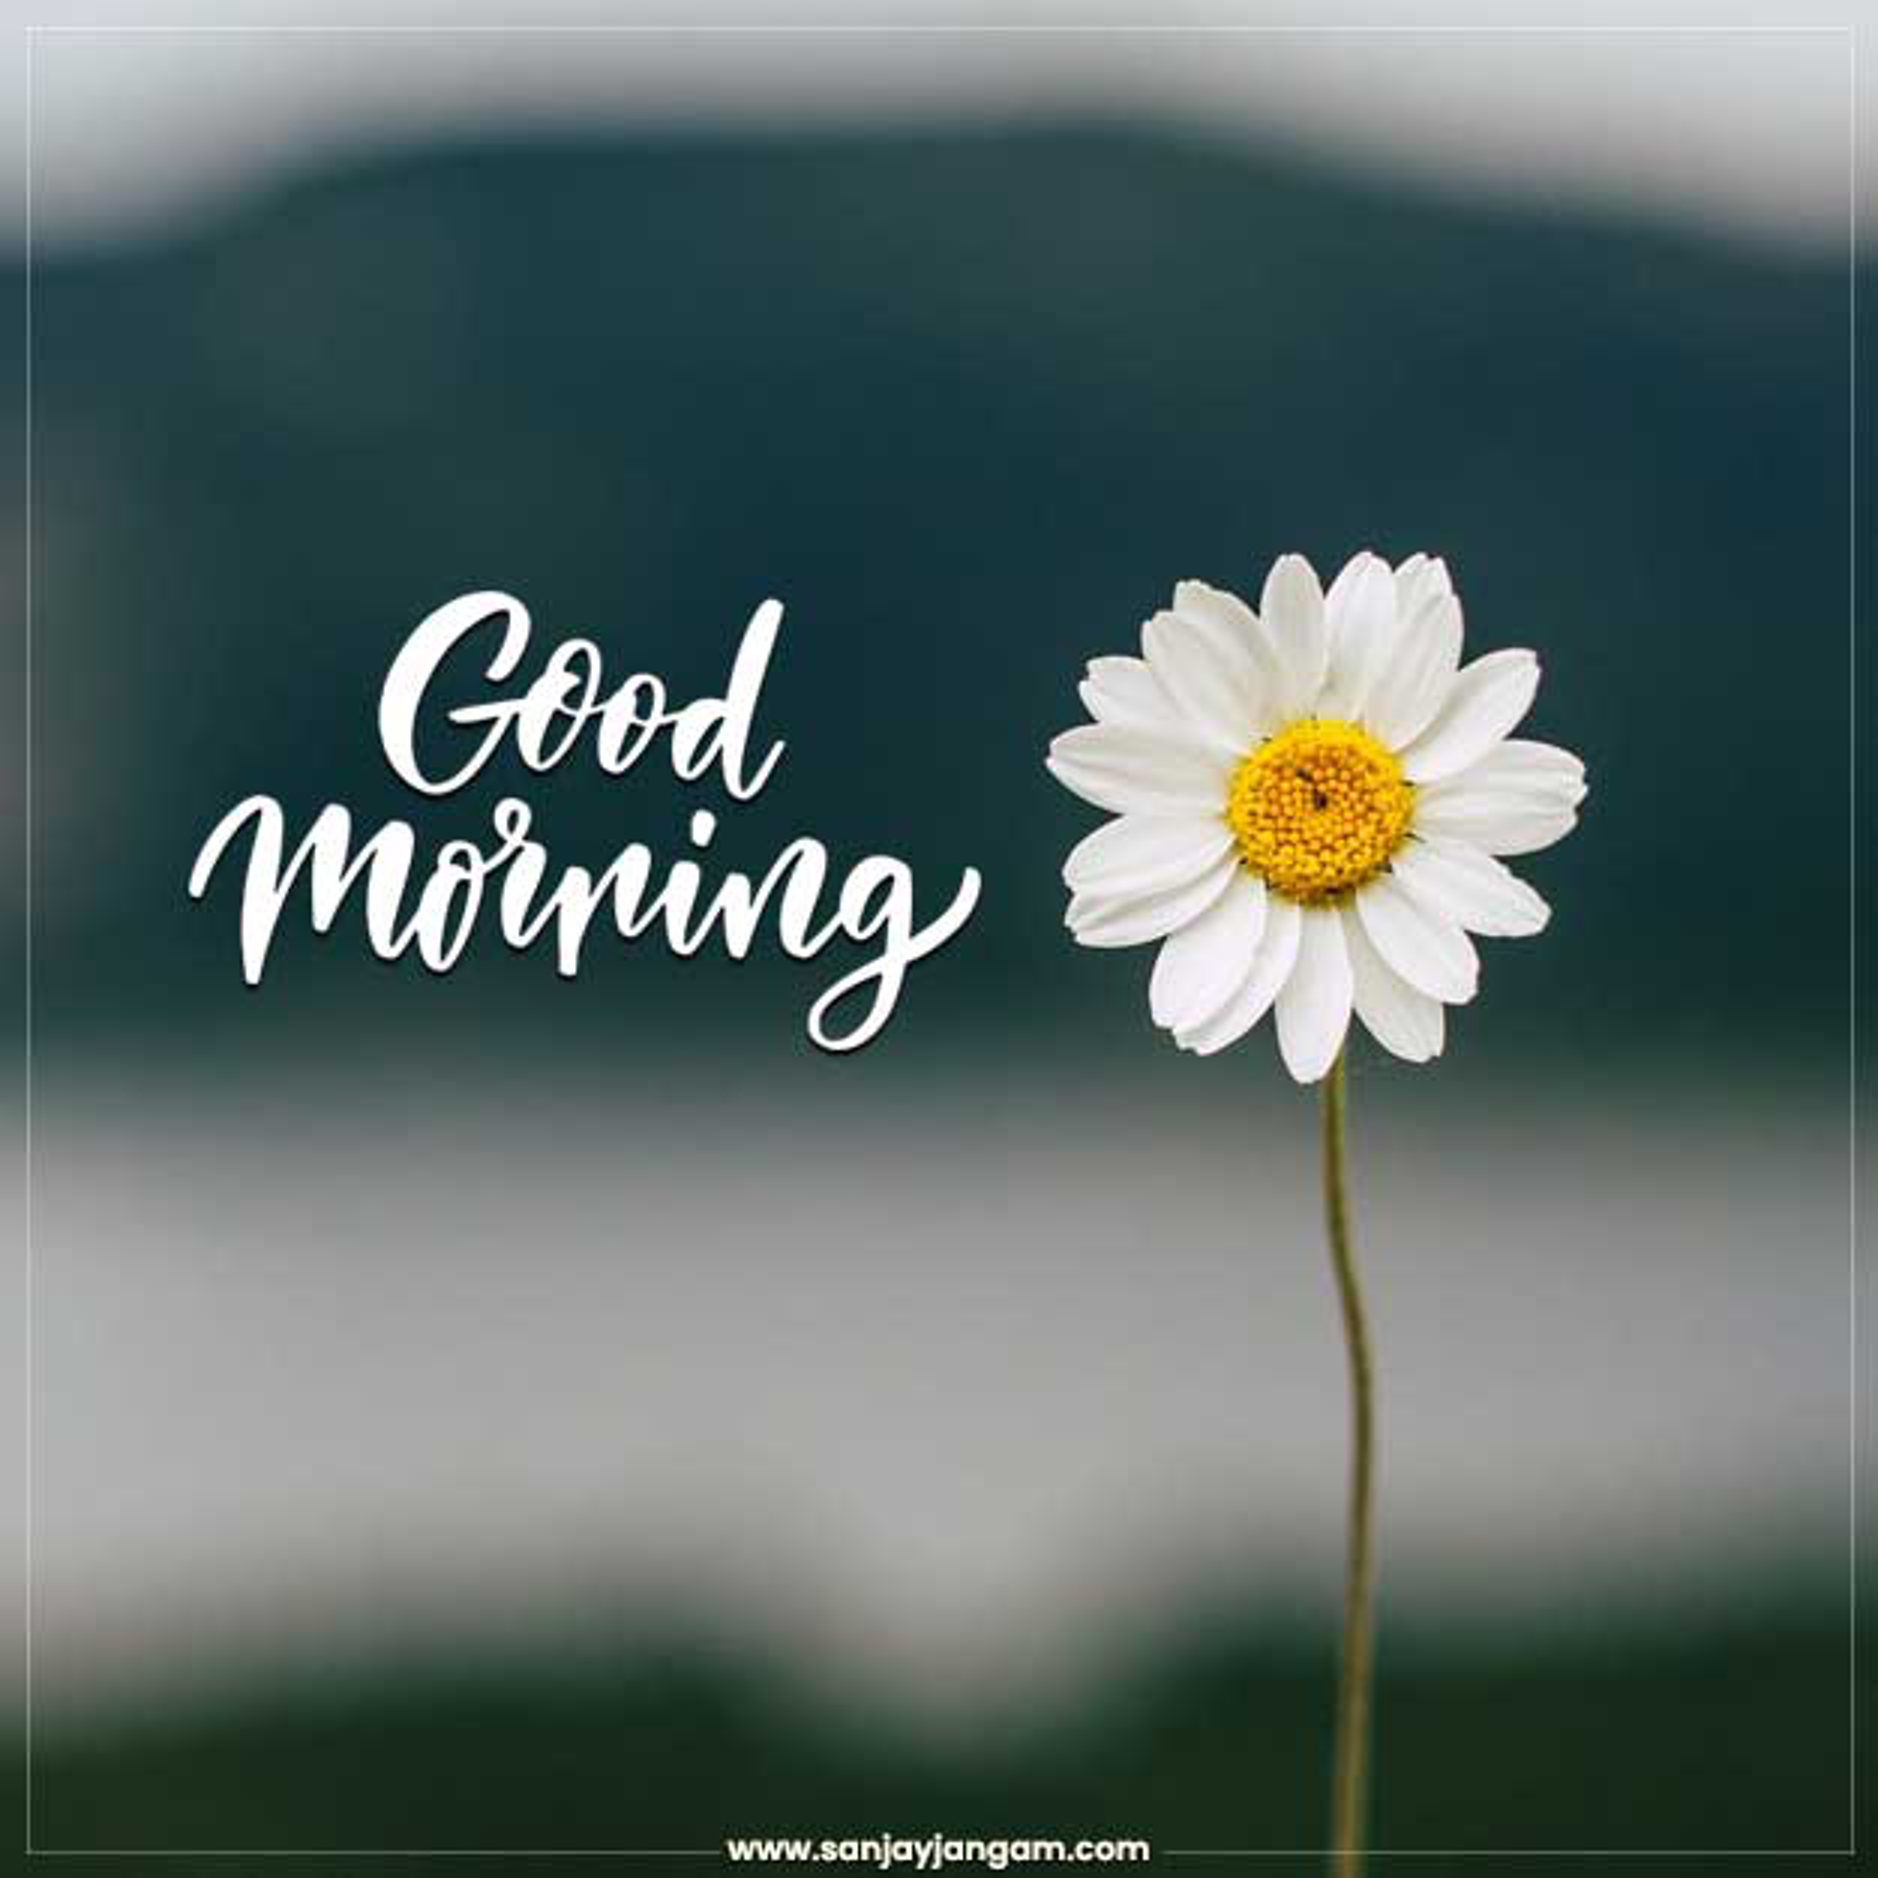

In [72]:
im1.resize(( 3* im1.width, 3* im1.height))

In [73]:
im2.resize(( im2.width//3, im2.height//3)).save('image3.png')

In [74]:
from PIL import ImageDraw, ImageFont

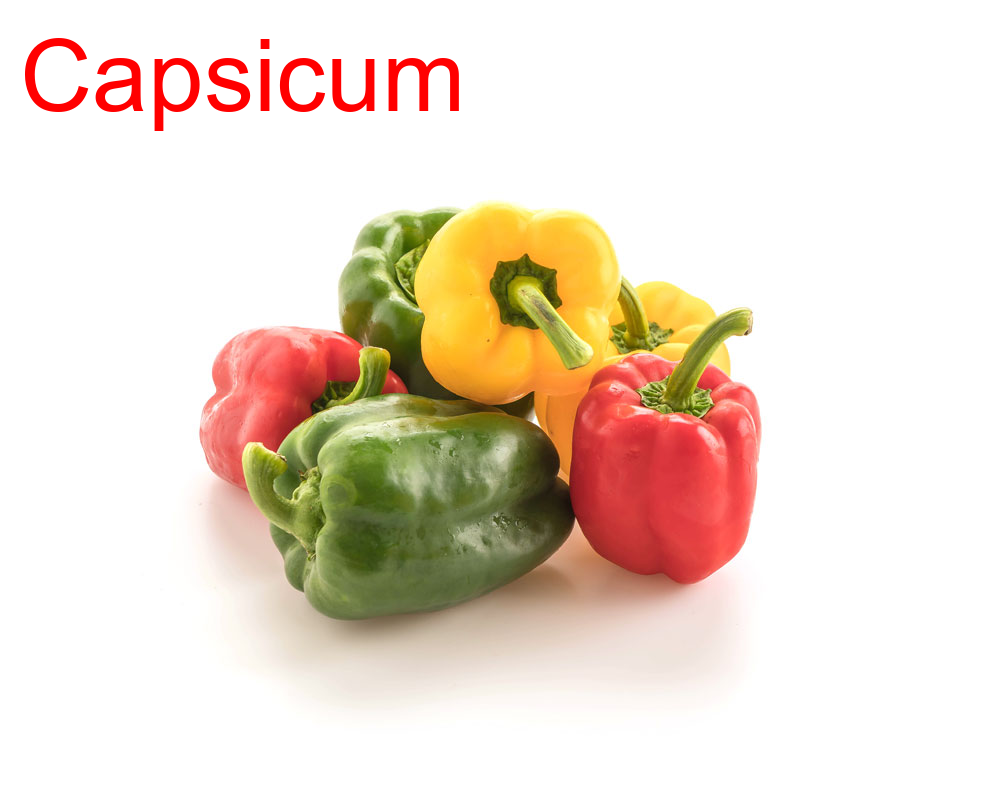

In [75]:
drawIm2 = ImageDraw.Draw(im2)
drawIm2.text((20,20), 'Capsicum', fill='red', font=ImageFont.truetype('arial.ttf', 100))
im2

In [76]:
im2.show()

21 oct 22

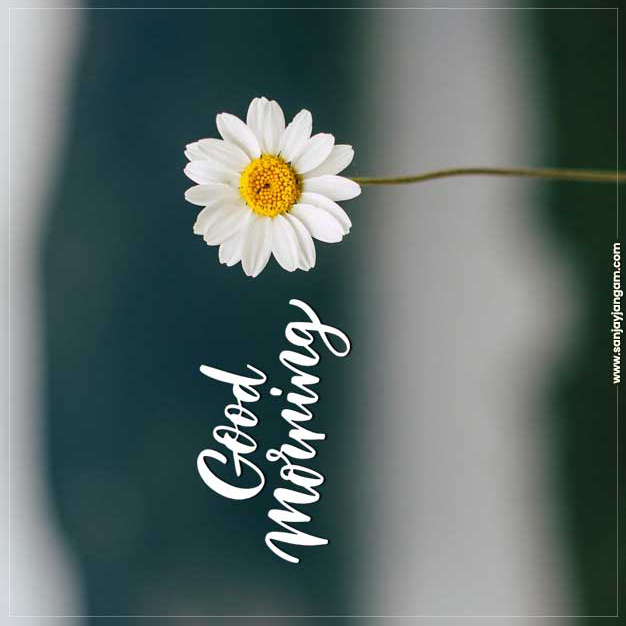

In [77]:
im1.rotate(90)

In [78]:
im2.rotate(30, expand=True, fillcolor='white').save('capsicum2.png')

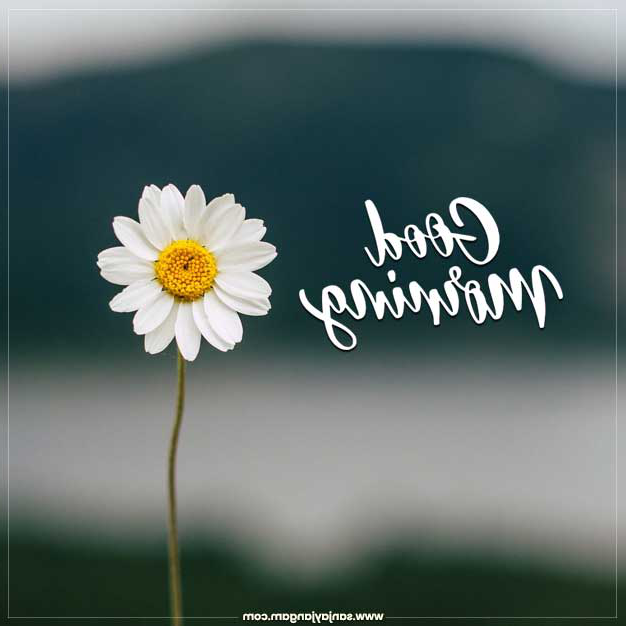

In [79]:
# IMAGE FLIP
im1.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
# if u are getting error then use this
# im1.transpose(Image.FLIP_LEFT_RIGHT)

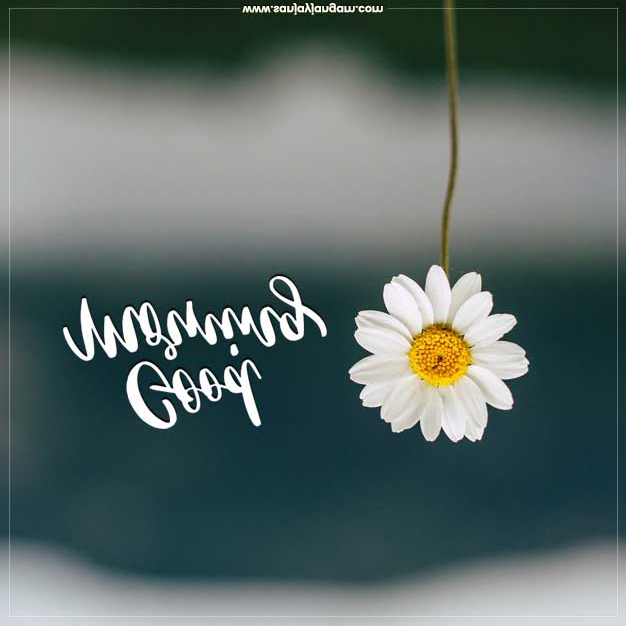

In [80]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [81]:
sky = download_img('https://img.freepik.com/free-photo/white-cloud-blue-sky_74190-2381.jpg?w=1800&t=st=1666358844~exp=1666359444~hmac=bfb53b92d5b4e0dbddb2ae526e20b8a3d581f0f191a15769445c05a38506ec6c')
sky.save('sky.jpg')

In [82]:
sheep = download_img('https://www.investopedia.com/thmb/nIII1VEEeKkOSOuLSSNv8nPMw0I=/2269x1322/filters:fill(auto,1)/GettyImages-155379351-fff005c918bd467daf32c935889a4487.jpg')
sheep.save('sheep.jpg')

In [83]:
print("Sky image resolution: ", sky.size)
print('Sky format: ', sky.format)
print("Sheep image resolution: ", sheep.size)
print('Sheep format: ', sheep.format)

Sky image resolution:  (1800, 1200)
Sky format:  JPEG
Sheep image resolution:  (2269, 1322)
Sheep format:  JPEG


In [84]:
def blend_image(image_1, image_2, mode='RGB', size=(100,100), alpha=0.5):
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    image_1 = image_1.convert(mode)
    image_2 = image_2.convert(mode)
    blended_image = Image.blend(image_1, image_2, alpha)
    return blended_image


In [85]:
blend_image(im2, im1, alpha=0.3, size=(1000,1000)).show()

In [86]:
icon = Image.open(r'C:\Users\ZAID\Documents\coding\betatracker\apps\static\assets\images\file-icons\128\002-tool.png')

In [100]:
im1 = im1.convert('RGBA')
im1.paste(icon, (0,0))
im1.show()

In [88]:
im1.paste(icon, (200,200))
im1.show()

In [99]:
def add_watermark(image, watermark, style=None, pos=(0,0)):
    image = image.convert('RGBA')                   # convert image to RGBA
    watermark = watermark.convert('RGBA')           # convert watermark to RGBA
    if style == 'tile':
        for x in range(0, image.width, watermark.width):
            for y in range(0, image.height, watermark.height):
                image.paste(watermark, (x,y), mask=watermark)
    elif style is None:
        image.paste(watermark, pos, mask=watermark)
    return image

In [108]:
add_watermark(im2, icon, pos=(im2.width-200,im2.height-200)).show()

In [109]:
from PIL import ImageFilter

In [112]:
filters  = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(7),
    ImageFilter.MinFilter(7),
    ImageFilter.MedianFilter(3),
    ImageFilter.ModeFilter(3),
    ImageFilter.GaussianBlur(30),
    ImageFilter.RankFilter(3, 3),
]

for i,filter in enumerate(filters):
    sheep.filter(filter).save(f'sheep_{i}.png')